## Trabajo práctico n°1

#### Visión por computadora

#### Enunciado
▪ Parte 1 (imágenes en /white_patch y /coord_cromaticas):
1. Implementar el algoritmo de pasaje a coordenadas cromáticas para librarnos de las variaciones de contraste.
2. Implementar el algoritmo White Patch para librarnos de las diferencias de color de iluminación.
3. Mostrar los resultados obtenidos y analizar las posibles fallas (si es que las hay) en el caso de White patch.


---

▪ Parte 2:
1. Para las imágenes img1_tp.png y img2_tp.png leerlas con OpenCV en escala de grisas y visualizarlas.
2. Elija el numero de bins que crea conveniente y grafique su histograma, compare los histogramas entre si.
Explicar lo que se observa, si tuviera que entrenar un modelo de clasificación/detección de imágenes,
considera que puede ser de utilidad tomar como ‘features’ a los histogramas?
3. Para la imagen segmentacion.png analice el histograma de los canales RGB. Segmente algunos de los
elementos presentes en la imagen (agua, cielo, tierra) y muestre, aplicando mascaras, las regiones en imágenes
separadas.


---

### Parte 1

#### 1. Implementar el algoritmo de pasaje a coordenadas cromáticas para librarnos de las variaciones de contraste.

In [2]:
#Si queremos que las imágenes sean mostradas en una ventana emergente quitar el inline
%matplotlib inline  
#%matplotlib qt
# OpenCV-Python utiliza NumPy para el manejo de imágenes
import numpy as np # type: ignore
# cv2 es el módulo python para acceder a OpenCV 
import cv2 as cv
# Usamos las poderosas herramientas de graficación de matplotlib para mostrar imágenes, perfiles, histogramas, etc
import matplotlib.pyplot as plt

#import os  # Para operaciones del sistema de archivos
from pathlib import Path  # Para manejo de rutas de archivos de manera más moderna


In [3]:

def process_chromatic_coordinates(img):
    """
    Función que procesa una imagen para obtener sus coordenadas cromáticas
    Parámetro: img - imagen en formato RGB
    Retorna: imagen procesada con coordenadas cromáticas
    """
    # Convertir la imagen a punto flotante para evitar truncamiento en los cálculos
    img_float = img.astype(np.float32)
    
    # Calcular la suma de los canales RGB para cada píxel
    # keepdims=True mantiene la dimensionalidad para la división
    # 1e-6 se suma para evitar división por cero
    sum_channels = np.sum(img_float, axis=2, keepdims=True) + 1e-6
    
    # Calcular la coordenada cromática r (rojo normalizado)
    r = img_float[:, :, 0:1] / sum_channels
    
    # Calcular la coordenada cromática g (verde normalizado)
    g = img_float[:, :, 1:2] / sum_channels
    
    # Calcular la coordenada cromática b (azul normalizado)
    b = 1 - r - g
    
    # Combinar los tres canales normalizados en una sola imagen
    return np.concatenate((r, g, b), axis=2)

def process_all_images(folder_path):
    """
    Función que procesa todas las imágenes PNG en una carpeta
    Parámetro: folder_path - ruta a la carpeta con las imágenes
    """
    # Crear una lista con todas las imágenes PNG en la carpeta especificada
    image_files = list(Path(folder_path).glob('*.png'))
    
    # Iterar sobre cada archivo de imagen encontrado
    for img_path in image_files:
        # Cargar la imagen usando OpenCV (por defecto en formato BGR)
        img = cv.imread(str(img_path))
        
        # Convertir la imagen de BGR a RGB (matplotlib usa RGB)
        img = cv.cvtColor(img, cv.COLOR_BGR2RGB)
        
        # Procesar la imagen para obtener coordenadas cromáticas
        img_chromatic = process_chromatic_coordinates(img)
        
        # Crear una nueva figura para mostrar los resultados
        plt.figure(figsize=(10, 5))  # Tamaño de la figura: 10x5 pulgadas
        
        # Agregar un título general con el nombre del archivo
        plt.suptitle(f'Imagen: {img_path.name}')
        
        # Configurar y mostrar la imagen original (subplot izquierdo)
        plt.subplot(1, 2, 1)  # 1 fila, 2 columnas, posición 1
        plt.title('Imagen Original')
        plt.imshow(img)
        plt.axis('off')  # Ocultar los ejes
        
        # Configurar y mostrar la imagen procesada (subplot derecho)
        plt.subplot(1, 2, 2)  # 1 fila, 2 columnas, posición 2
        plt.title('Coordenadas Cromáticas')
        plt.imshow(img_chromatic)
        plt.axis('off')  # Ocultar los ejes
        
        # Mostrar la figura con ambas imágenes
        plt.show()

# Definir la ruta a la carpeta que contiene las imágenes
folder_path = './Trabajos Practicos/TP1/coord_cromaticas'
folder_path2 = './Trabajos Practicos/TP1/white_patch'
# Ejecutar el procesamiento de todas las imágenes en la carpeta
process_all_images(folder_path)
process_all_images(folder_path2)

- Se esta normalizando el color por cada píxel para eliminar efectos de intensidad y sombra.
- Se conserva información puramente cromática, útil para clasificación de colores, segmentación, etc.

#### 2. Implementar el algoritmo White Patch para librarnos de las diferencias de color de iluminación.

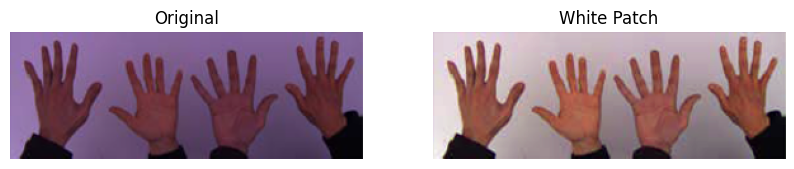

In [5]:
# Cargar imagen
img_bgr = cv.imread('./white_patch/test_blue.png') 
img_rgb = cv.cvtColor(img_bgr, cv.COLOR_BGR2RGB)

# Convertir a float para evitar truncamientos
img_float = img_rgb.astype(np.float32)

# Aplicar White Patch por canal
max_vals = np.max(np.max(img_float, axis=0), axis=0)  # valores máximos por canal R, G, B
white_patch = img_float / (max_vals + 1e-6)  # evitar división por cero

# Escalar a [0,255] y convertir a uint8
white_patch = np.clip(white_patch * 255, 0, 255).astype(np.uint8)

# Mostrar imágenes
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.title('Original')
plt.imshow(img_rgb)
plt.axis('off')

plt.subplot(1, 2, 2)
plt.title('White Patch')
plt.imshow(white_patch)
plt.axis('off')

plt.show()

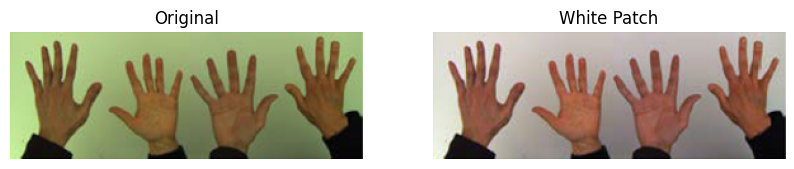

In [6]:
# Cargar imagen
img_bgr = cv.imread('./white_patch/test_green.png')  
img_rgb = cv.cvtColor(img_bgr, cv.COLOR_BGR2RGB)

# Convertir a float para evitar truncamientos
img_float = img_rgb.astype(np.float32)

# Aplicar White Patch por canal
max_vals = np.max(np.max(img_float, axis=0), axis=0)  # valores máximos por canal R, G, B
white_patch = img_float / (max_vals + 1e-6)  # evitar división por cero

# Escalar a [0,255] y convertir a uint8
white_patch = np.clip(white_patch * 255, 0, 255).astype(np.uint8)

# Mostrar imágenes
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.title('Original')
plt.imshow(img_rgb)
plt.axis('off')

plt.subplot(1, 2, 2)
plt.title('White Patch')
plt.imshow(white_patch)
plt.axis('off')

plt.show()

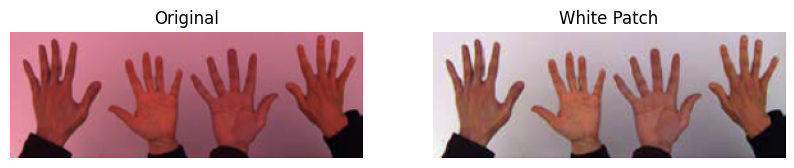

In [7]:
# Cargar imagen
img_bgr = cv.imread('./white_patch/test_red.png') 
img_rgb = cv.cvtColor(img_bgr, cv.COLOR_BGR2RGB)

# Convertir a float para evitar truncamientos
img_float = img_rgb.astype(np.float32)

# Aplicar White Patch por canal
max_vals = np.max(np.max(img_float, axis=0), axis=0)  # valores máximos por canal R, G, B
white_patch = img_float / (max_vals + 1e-6)  # evitar división por cero

# Escalar a [0,255] y convertir a uint8
white_patch = np.clip(white_patch * 255, 0, 255).astype(np.uint8)

# Mostrar imágenes
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.title('Original')
plt.imshow(img_rgb)
plt.axis('off')

plt.subplot(1, 2, 2)
plt.title('White Patch')
plt.imshow(white_patch)
plt.axis('off')

plt.show()

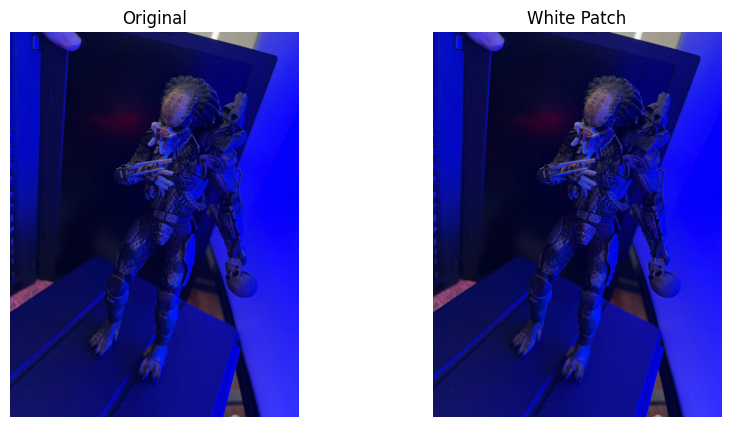

Valores máximos RGB: [255. 255. 255.]


In [ ]:
# Cargar imagen
img_bgr = cv.imread('./white_patch/wp_blue.jpg')  
img_rgb = cv.cvtColor(img_bgr, cv.COLOR_BGR2RGB)

# Convertir a float para evitar truncamientos
img_float = img_rgb.astype(np.float32)

# Aplicar White Patch por canal
max_vals = np.max(np.max(img_float, axis=0), axis=0)  # valores máximos por canal R, G, B
white_patch = img_float / (max_vals + 1e-6)  # evitar división por cero

# Escalar a [0,255] y convertir a uint8
white_patch = np.clip(white_patch * 255, 0, 255).astype(np.uint8)

# Mostrar imágenes
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.title('Original')
plt.imshow(img_rgb)
plt.axis('off')

plt.subplot(1, 2, 2)
plt.title('White Patch')
plt.imshow(white_patch)
plt.axis('off')

plt.show()

print("Valores máximos RGB:", max_vals)


Valores máximos RGB: [255. 134. 122.]


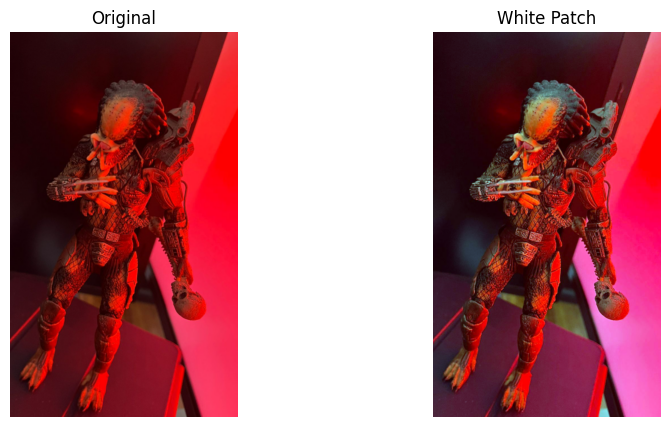

In [8]:
# Cargar imagen
img_bgr = cv.imread('./white_patch/wp_red.png')  # cambia esto por el path real
img_rgb = cv.cvtColor(img_bgr, cv.COLOR_BGR2RGB)

# Convertir a float para evitar truncamientos
img_float = img_rgb.astype(np.float32)

# Aplicar White Patch por canal
max_vals = np.max(np.max(img_float, axis=0), axis=0)  # valores máximos por canal R, G, B
white_patch = img_float / (max_vals + 1e-6)  # evitar división por cero

# Escalar a [0,255] y convertir a uint8
white_patch = np.clip(white_patch * 255, 0, 255).astype(np.uint8)

# Mostrar imágenes
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.title('Original')
plt.imshow(img_rgb)
plt.axis('off')

plt.subplot(1, 2, 2)
plt.title('White Patch')
plt.imshow(white_patch)
plt.axis('off')

print("Valores máximos RGB:", max_vals)

plt.show()

#### 3. Mostrar los resultados obtenidos y analizar las posibles fallas (si es que las hay) en el caso de White patch.

#### Análisis  de posibles fallas de white patch
##### En la imaginen azul del depredador observamos que no tenemos una corrección y esto se debe a:
- Ausencia de un blanco verdadero en la imagen, porque no hay ningún objeto blanco, el algoritmo no tiene referencia real.
- El píxel más brillante de la imagen probablemente pertenece a una región iluminada por luz azul intensa, por lo que el algoritmo asumió que ese azul intenso era blanco.
- Las partes que deberían ser blancas (como los dientes o las garras) no se ven completamente blancas tras la corrección.
- Conclusión:
    - No hay un blanco real visible sin tinte.
    - La fuente de iluminación es fuertemente azul (sesgada).
    - La corrección se hace en base a una falsa suposición de qué es blanco.

##### En la imagen roja del depredador observamos:
- En el caso de la imagen roja del depredador aquí sí se nota una corrección más efectiva, recupera un poco de naturalidad: se pueden distinguir más matices en la piel, el cabello, y la textura de la ropa.
- El algoritmo podria en este caso tambien estar haciendo una falsa suposición sobre qué es blanco, similar al caso anterior.

### Parte 2

1. Para las imágenes img1_tp.png y img2_tp.png leerlas con OpenCV en escala de grises y visualizarlas.

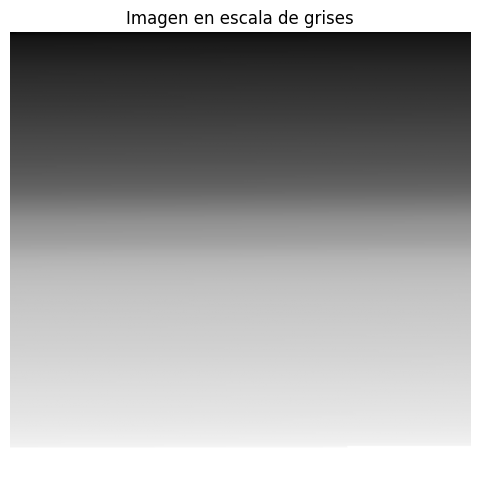

In [9]:
img_gray1 = cv.imread('./img1_tp.png', cv.IMREAD_GRAYSCALE)

# Visualizar en Jupyter con matplotlib
plt.figure(figsize=(6,6))
plt.imshow(img_gray1, cmap='gray')
plt.title('Imagen en escala de grises')
plt.axis('off')
plt.show()

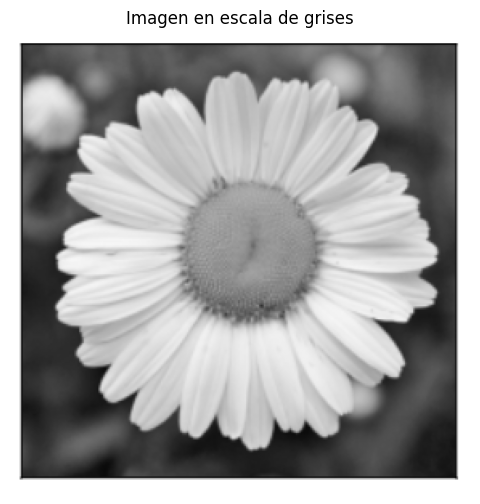

In [10]:
img_gray2 = cv.imread('./img2_tp.png', cv.IMREAD_GRAYSCALE)

# Visualizar en Jupyter con matplotlib
plt.figure(figsize=(6,6))
plt.imshow(img_gray2, cmap='gray')
plt.title('Imagen en escala de grises')
plt.axis('off')
plt.show()

2. Elija el numero de bins que crea conveniente y grafique su histograma, compare los histogramas entre si.
Explicar lo que se observa, si tuviera que entrenar un modelo de clasificación/detección de imágenes, considera que puede ser de utilidad tomar como ‘features’ a los histogramas?.

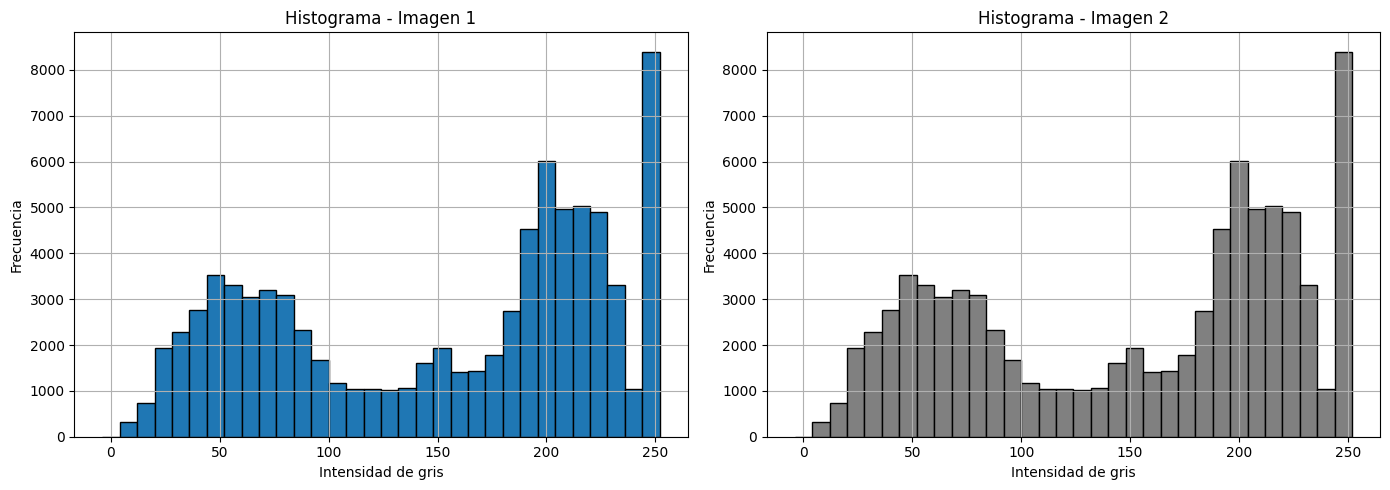

In [11]:

ruta_img1 = './img1_tp.png'
ruta_img2 = './img2_tp.png'

# Leer imágenes en escala de grises
img1 = cv.imread(ruta_img1, cv.IMREAD_GRAYSCALE)
img2 = cv.imread(ruta_img2, cv.IMREAD_GRAYSCALE)

# Número de bins para el histograma
num_bins = 32

# Calcular histogramas
hist1 = cv.calcHist([img1], [0], None, [num_bins], [0, 256]).ravel()
hist2 = cv.calcHist([img2], [0], None, [num_bins], [0, 256]).ravel()
bins = np.linspace(0, 256, num_bins + 1)

# Graficar los histogramas lado a lado
plt.figure(figsize=(14, 5))

plt.subplot(1, 2, 1)
plt.bar(bins[:-1], hist1, width=(256/num_bins), edgecolor='black')
plt.title('Histograma - Imagen 1')
plt.xlabel('Intensidad de gris')
plt.ylabel('Frecuencia')
plt.grid(True)

plt.subplot(1, 2, 2)
plt.bar(bins[:-1], hist2, width=(256/num_bins), edgecolor='black', color='gray')
plt.title('Histograma - Imagen 2')
plt.xlabel('Intensidad de gris')
plt.ylabel('Frecuencia')
plt.grid(True)

plt.tight_layout()
plt.show()

#### Explicacion:
- Observamos que ambos histogramas son similares.
- El histograma solo refleja qué tonos de gris hay y cuántos, no dónde están ni cómo están organizados.
- El histograma ignora la estructura espacial:
    - La flor tiene formas, bordes, simetría, mientras que el gradiente es completamente liso.
    - Pero el histograma no puede distinguir eso.
- Si entrenás un modelo solo con histogramas, podría confundir dos imágenes muy distintas si tienen distribución tonal parecida.
- Se deberia usar histogramas como parte de un conjunto de features, no como únicos.



3. Para la imagen segmentacion.png analice el histograma de los canales RGB. Segmente algunos de los
elementos presentes en la imagen (agua, cielo, tierra) y muestre, aplicando mascaras, las regiones en imágenes
separadas.


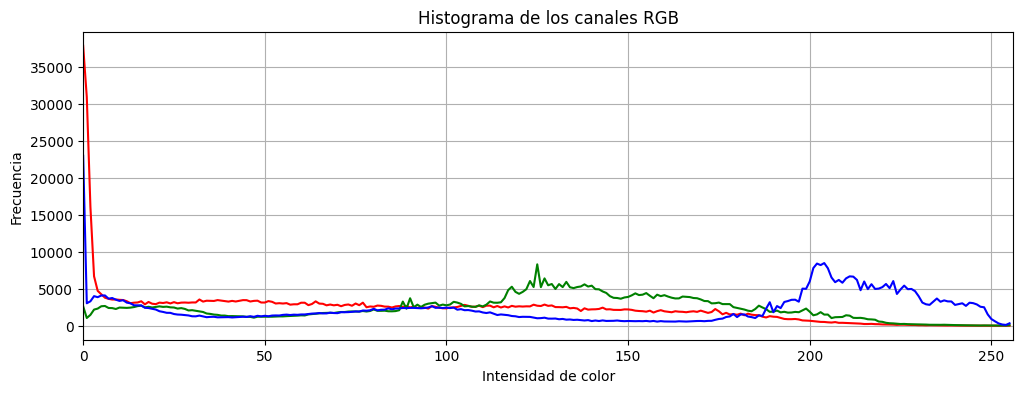

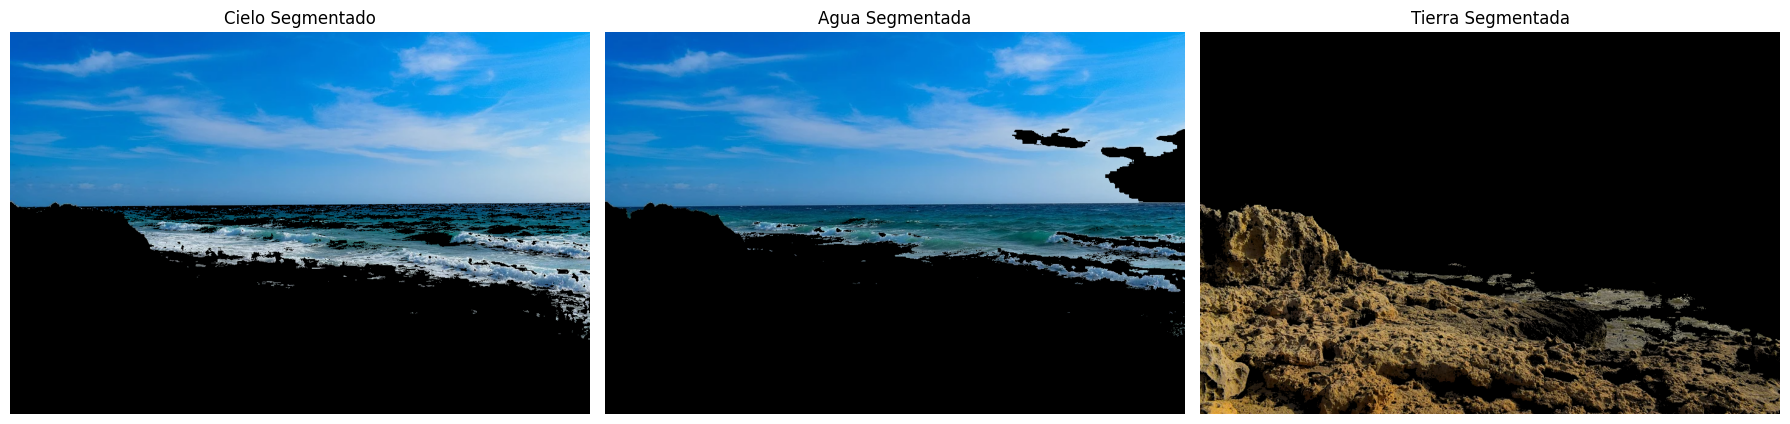

In [13]:
# Cargar la imagen
image_path = "./segmentacion.png"
image = cv.imread(image_path)
image_rgb = cv.cvtColor(image, cv.COLOR_BGR2RGB)

# Calcular los histogramas de los canales R, G, B
colors = ('r', 'g', 'b')
plt.figure(figsize=(12, 4))
for i, color in enumerate(colors):
    hist = cv.calcHist([image_rgb], [i], None, [256], [0, 256])
    plt.plot(hist, color=color)
    plt.xlim([0, 256])
plt.title('Histograma de los canales RGB')
plt.xlabel('Intensidad de color')
plt.ylabel('Frecuencia')
plt.grid(True)
plt.show()

# Convertir la imagen al espacio HSV para facilitar segmentación por color
image_hsv = cv.cvtColor(image, cv.COLOR_BGR2HSV)

# Definir rangos de color para cielo, agua, tierra
sky_mask = cv.inRange(image_hsv, (90, 20, 100), (140, 255, 255))     # Azul claro a medio
water_mask = cv.inRange(image_hsv, (80, 60, 60), (110, 255, 255))    # Azul profundo a verdoso
land_mask = cv.inRange(image_hsv, (10, 30, 30), (30, 255, 255))      # Marrón claro a dorado

# Aplicar máscaras para extraer las regiones
sky_segment = cv.bitwise_and(image_rgb, image_rgb, mask=sky_mask)
water_segment = cv.bitwise_and(image_rgb, image_rgb, mask=water_mask)
land_segment = cv.bitwise_and(image_rgb, image_rgb, mask=land_mask)

# Mostrar las imágenes segmentadas
fig, axes = plt.subplots(1, 3, figsize=(18, 6))
axes[0].imshow(sky_segment)
axes[0].set_title("Cielo Segmentado")
axes[0].axis('off')

axes[1].imshow(water_segment)
axes[1].set_title("Agua Segmentada")
axes[1].axis('off')

axes[2].imshow(land_segment)
axes[2].set_title("Tierra Segmentada")
axes[2].axis('off')

plt.tight_layout()
plt.show()

Se aplicaron máscaras basadas en rangos de color en HSV para aislar:

1. Cielo -> Tonos azul claro a medio.
    - La máscara captó bien la parte superior del cielo, aunque algunas nubes o reflejos se perdieron por variabilidad.
2. Agua (mar) -> Tonos azul profundo, cian y verde azulado.
    - La segmentación separó bastante bien el agua del resto, aunque con ligeras confusiones en zonas con espuma blanca.
3. Tierra (rocas) -> Tonos marrones, ocres y dorados.
    - La segmentación fue precisa: la región rocosa fue extraída de forma clara.

#### Conclusión
- Los histogramas RGB te ayudan a entender la dominancia de colores, pero no son suficientes para segmentar objetos complejos.
- El uso del espacio HSV mejora significativamente la capacidad de segmentar por color.
- Esta segmentación puede servir como paso previo para análisis de regiones, clasificación o incluso para entrenar modelos supervisados.